In [57]:
# Importing necessaries libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv


In [3]:
# Load the data
data = pd.read_csv("/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv")

In [4]:
# Display the first few records
data.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


# Fields and Data Types 📊:
The dataset includes the following attributes:

* User ID: An individual's unique identification number.
* Age: The age of the individual.
* Gender: The sex of the individual ('f' female, 'm' male)
* Sleep Quality: The quality of an individual's sleep (a scale of 1-10, with 10 indicating the highest quality)
* Bedtime: The individual's bedtime (in 24-hour format)
* Wake-up Time: The individual's wake-up time (in 24-hour format)
* Daily Steps: Number of steps per day
* Calories Burned: The amount of calories burned per day
* Physical Activity Level: The individual's physical activity level (low, medium, high)
* Dietary Habits: Dietary habits of the individual (healthy, medium, unhealthy)
* Sleep Disorders: Whether the individual has sleep disorders (yes, no)
* Medication Usage: Whether the individual uses medication for sleep disorders (yes, no)
* Explanation: These data are imaginary data. It was created entirely for the purpose of improving users, it has nothing to do with reality.

In [5]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB
None


In [6]:
# Descriptive statistics
data.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [7]:
# Display column names
data.columns

Index(['User ID', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage'],
      dtype='object')

In [10]:
# Renames the dataset and removes the space
data=data.rename(columns={
    "User ID":"User_ID",
    "Sleep Quality": "Sleep_Quality",
    "Wake-up Time": "Wake-up_Time",
    "Daily Steps": "Daily_Steps",
    "Calories Burned": "Calories_Burned",
    "Physical Activity Level": "Physical_Activity_Level",
    "Dietary Habits": "Dietary_Habits", 
    "Sleep Disorders": "Sleep_Disorders" , 
    "Medication Usage": "Medication_Usage" ,
    })
data.head()

,User_ID,Age,Gender,Sleep_Quality,Bedtime,Wake-up_Time,Daily_Steps,Calories_Burned,Physical_Activity_Level,Dietary_Habits,Sleep_Disorders,Medication_Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


# Handling missing data

In [11]:
data.isnull().sum()

User_ID                    0
Age                        0
Gender                     0
Sleep_Quality              0
Bedtime                    0
Wake-up_Time               0
Daily_Steps                0
Calories_Burned            0
Physical_Activity_Level    0
Dietary_Habits             0
Sleep_Disorders            0
Medication_Usage           0
dtype: int64

# EDA (Exploratory Data Analysis)

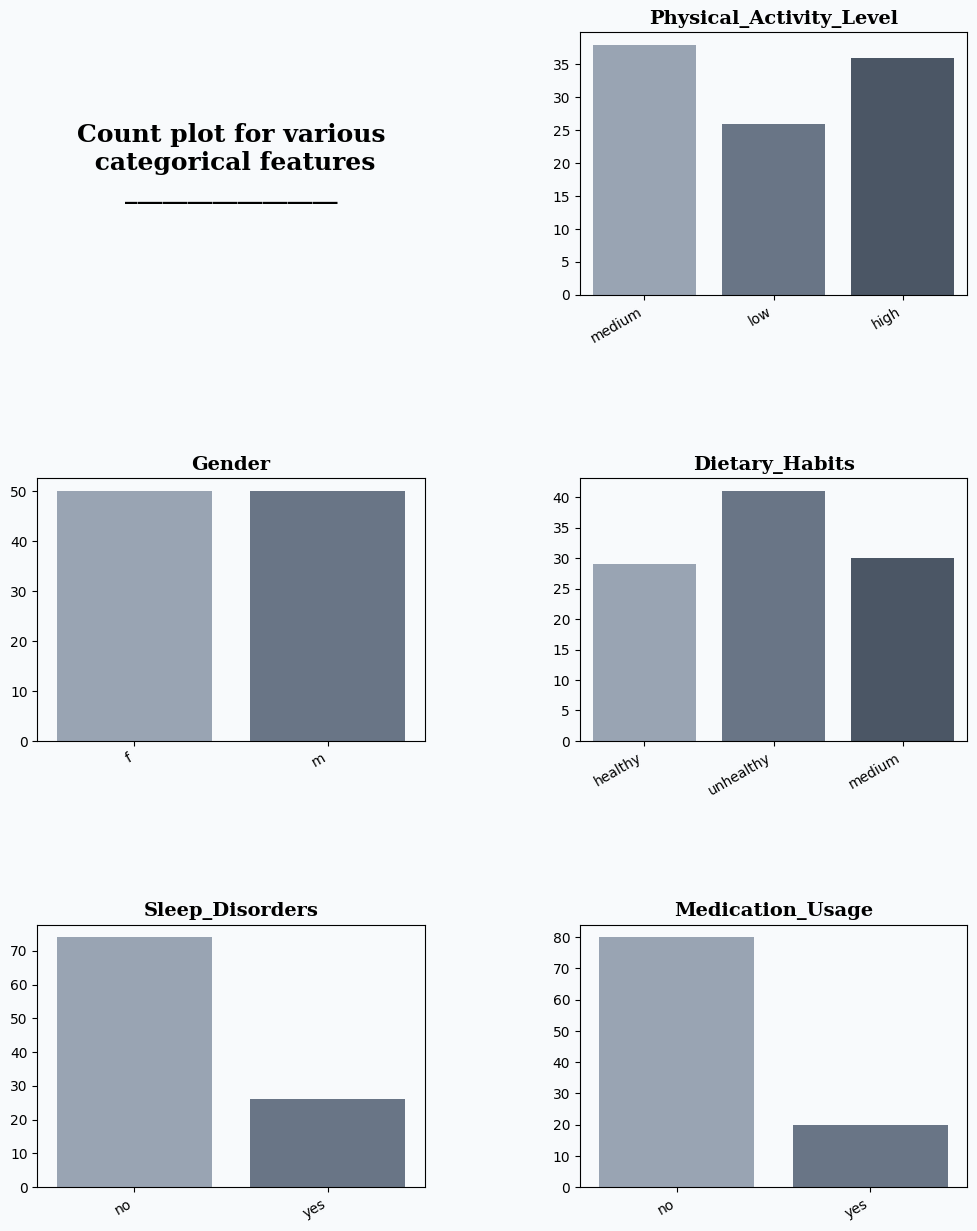

In [37]:
# Figure adjustments

# Larger size for better visualization
fig = plt.figure(figsize=(12, 15))  
gs = fig.add_gridspec(3, 2)
# Increases space between subplots
gs.update(wspace=0.4, hspace=0.7)  


background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]
fig.patch.set_facecolor(background_color)
axes = [fig.add_subplot(gs[i,j]) for i in range(3) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Count plot for various\n categorical features\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Plot for each categorical feature
plot_features = ['Physical_Activity_Level', 'Gender', 'Dietary_Habits',"Sleep_Disorders","Medication_Usage"]
titles = ["Physical_Activity_Level", "Gender", "Dietary_Habits", "Sleep_Disorders", "Medication_Usage"]

for i, feature in enumerate(plot_features):
    ax = axes[i + 1]
    ax.set_title(titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    sns.countplot(ax=ax, data=data, x=feature, palette=color_palette)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Adjust and show
plt.show()

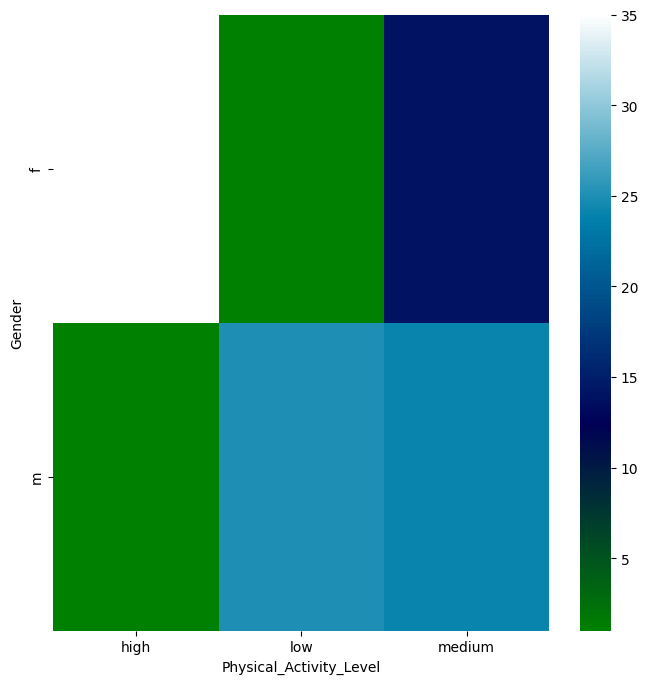

In [14]:
# Gender vs Physical_Activity_Level
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in data.groupby('Physical_Activity_Level')
})
sns.heatmap(df_2dhist, cmap='ocean')
plt.xlabel('Physical_Activity_Level')
_ = plt.ylabel('Gender')

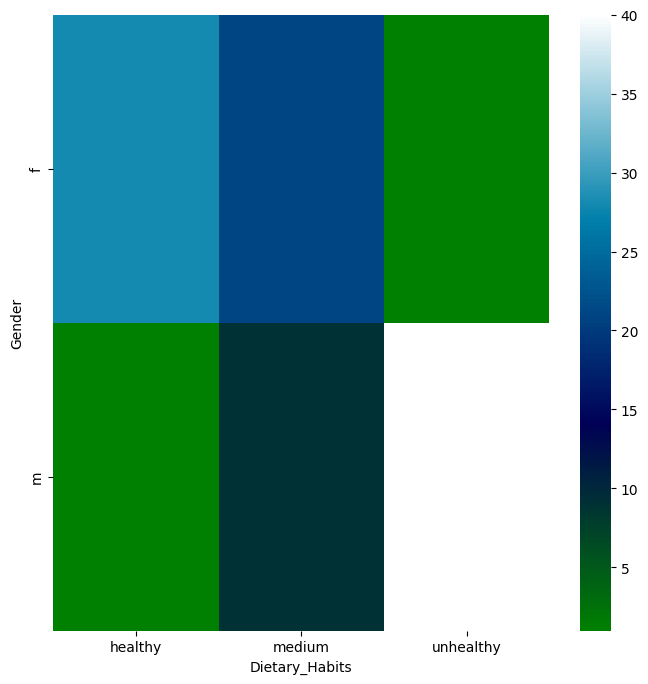

In [15]:
# Gender vs Dietary_Habits
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in data.groupby('Dietary_Habits')
})
sns.heatmap(df_2dhist, cmap='ocean')
plt.xlabel('Dietary_Habits')
_ = plt.ylabel('Gender')

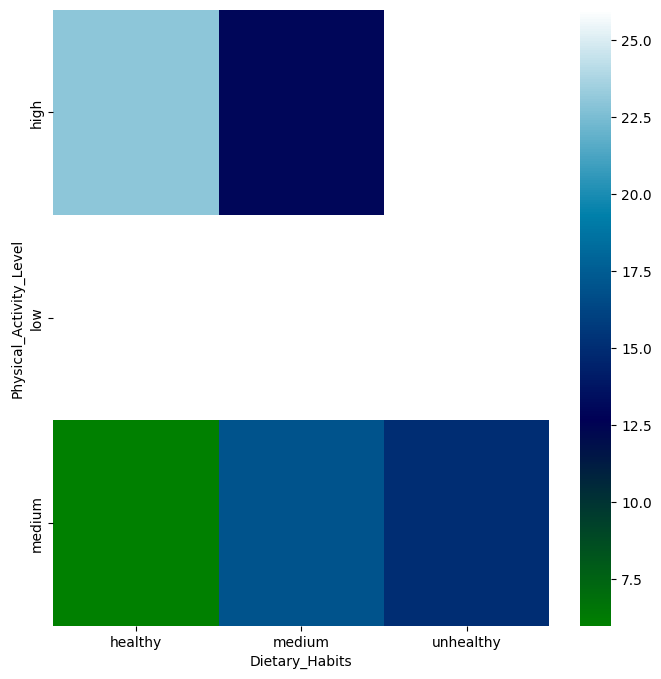

In [16]:
# Physical_Activity_Level vs Dietary_Habits
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Physical_Activity_Level'].value_counts()
    for x_label, grp in data.groupby('Dietary_Habits')
})
sns.heatmap(df_2dhist, cmap='ocean')
plt.xlabel('Dietary_Habits')
_ = plt.ylabel('Physical_Activity_Level')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

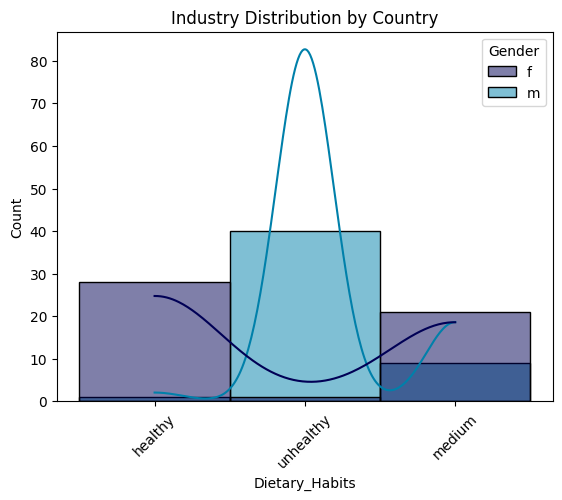

In [18]:
# Dietary_Habits by Gender
plt.xticks(rotation=45)
sns.histplot(data=data, x='Dietary_Habits', hue="Gender",palette="ocean", kde=True)
plt.title('Industry Distribution by Country')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

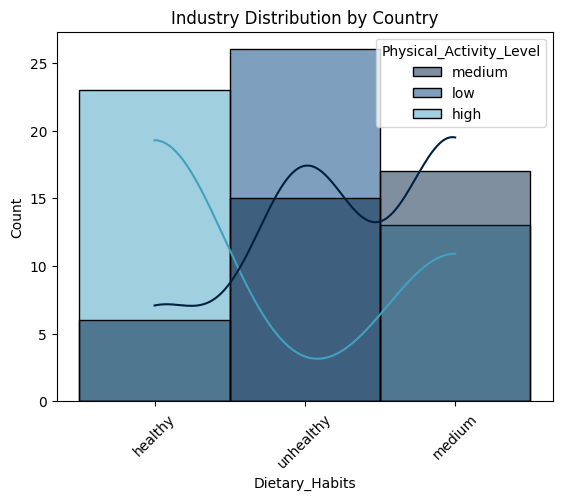

In [19]:
# Dietary_Habits by Physical_Activity_Level
plt.xticks(rotation=45)
sns.histplot(data=data, x='Dietary_Habits', hue="Physical_Activity_Level",palette="ocean", kde=True)
plt.title('Industry Distribution by Country')
plt.show()

/tmp/ipykernel_37/140854102.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Age'],palette="ocean" , kde=True, bins=30)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


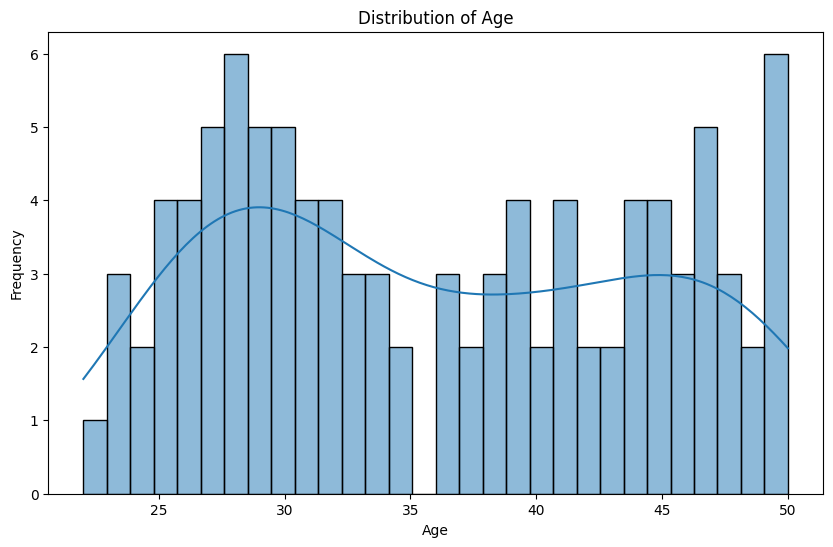

In [23]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], palette="ocean" , kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

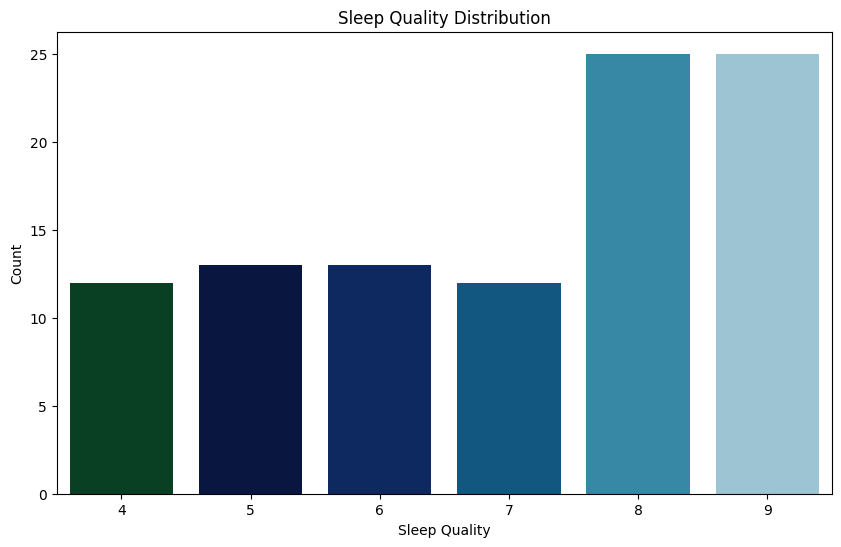

In [26]:
# Distribution of Sleep Quality
plt.figure(figsize=(10, 6))
sns.countplot(x='Sleep_Quality', data=data, palette="ocean")
plt.title('Sleep Quality Distribution')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()

In [28]:
# Convert Bedtime and Wake-up Time to datetime
data['Bedtime'] = pd.to_datetime(data['Bedtime'])
data['Wake-up_Time'] = pd.to_datetime(data['Wake-up_Time'])

/tmp/ipykernel_37/2713129644.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Bedtime'] = pd.to_datetime(data['Bedtime'])
/tmp/ipykernel_37/2713129644.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Wake-up_Time'] = pd.to_datetime(data['Wake-up_Time'])


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


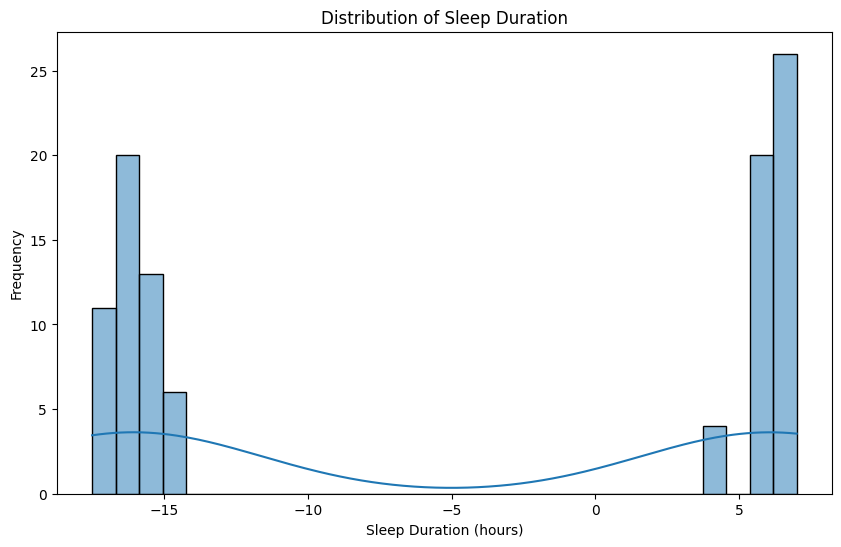

In [31]:
# Calculate sleep duration in hours
data['Sleep_Duration'] = (data['Wake-up_Time'] - data['Bedtime']).dt.total_seconds() / 3600

plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep_Duration'], kde=True, bins=30)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

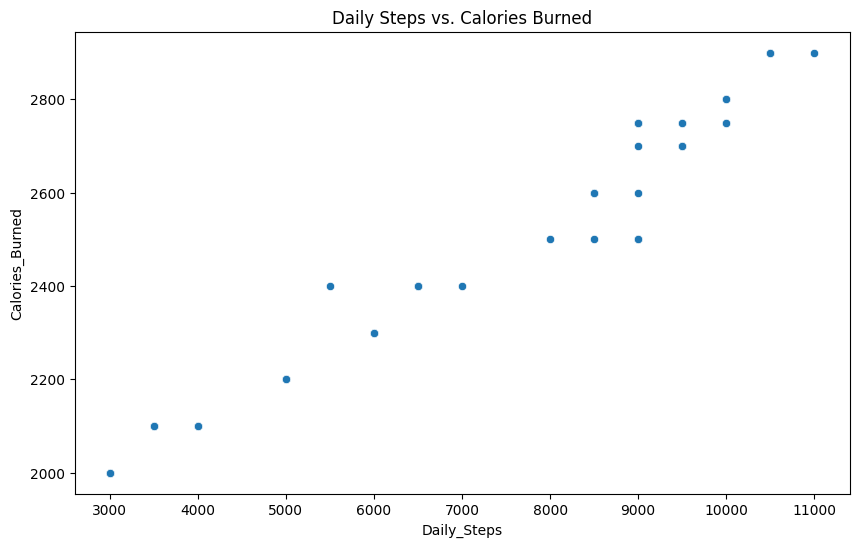

In [33]:
# Scatter plot of Daily Steps vs. Calories Burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily_Steps', y='Calories_Burned', data=data)
plt.title('Daily Steps vs. Calories Burned')
plt.xlabel('Daily_Steps')
plt.ylabel('Calories_Burned')
plt.show()

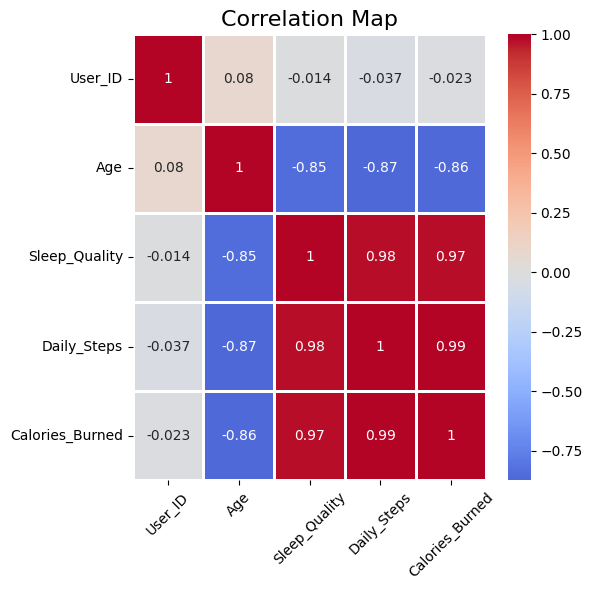

In [12]:
# Select numeric columns from the dataset
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Create correlation heatmap
plt.figure(figsize=(6, 6))  # Increase figure size
plt.title('Correlation Map', fontsize=16)  # Add font size to title
ax = sns.heatmap(numeric_columns.corr(), linewidths=1, annot=True, center=0, cmap="coolwarm")  # Adjust spacing and use cmap
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Keep y labels without rotation
plt.tight_layout()  # Automatically adjust spacing between subplots so that the elements of the plot fit into the figure
plt.show()

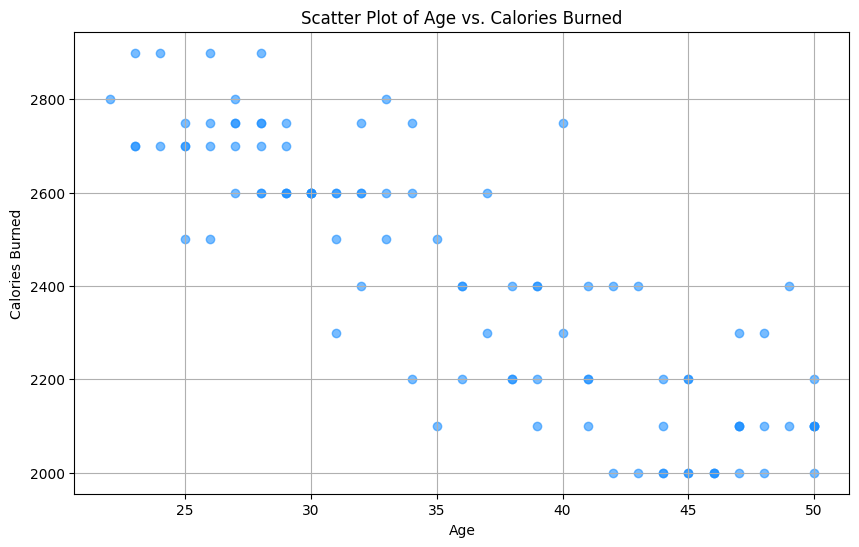

In [41]:
# Scatter plot of Age vs. Calories Burned
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Calories_Burned'], alpha=0.6, color='dodgerblue')
plt.title('Scatter Plot of Age vs. Calories Burned')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()

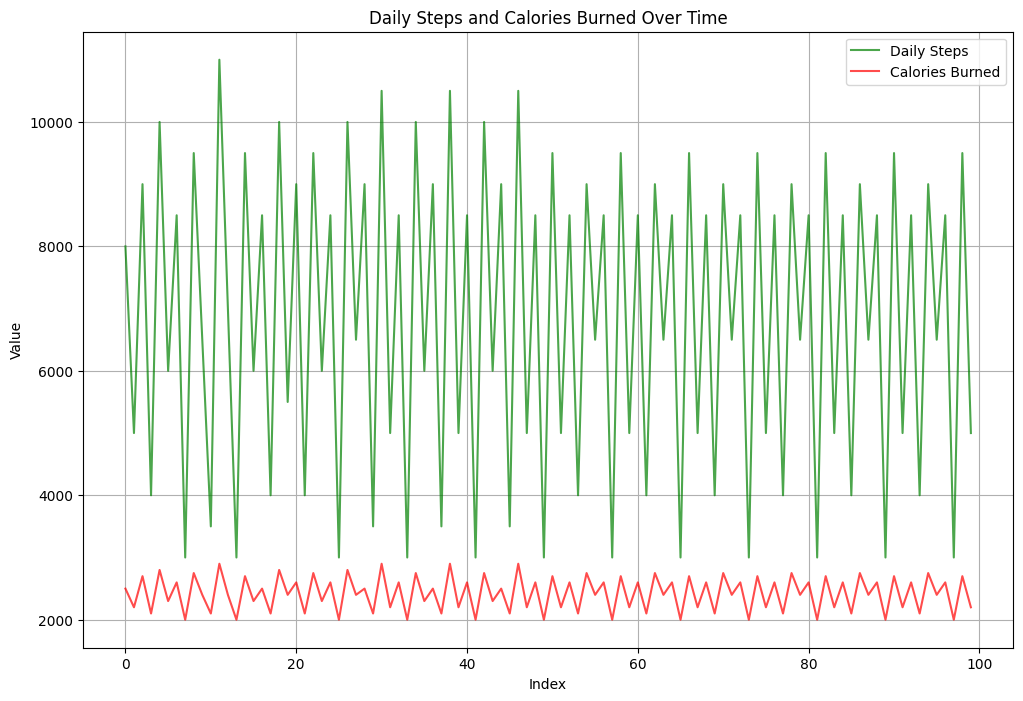

In [42]:
# Line plot of Daily Steps and Calories Burned over time
plt.figure(figsize=(12, 8))
plt.plot(data['Daily_Steps'], label='Daily Steps', color='green', alpha=0.7)
plt.plot(data['Calories_Burned'], label='Calories Burned', color='red', alpha=0.7)
plt.title('Daily Steps and Calories Burned Over Time')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

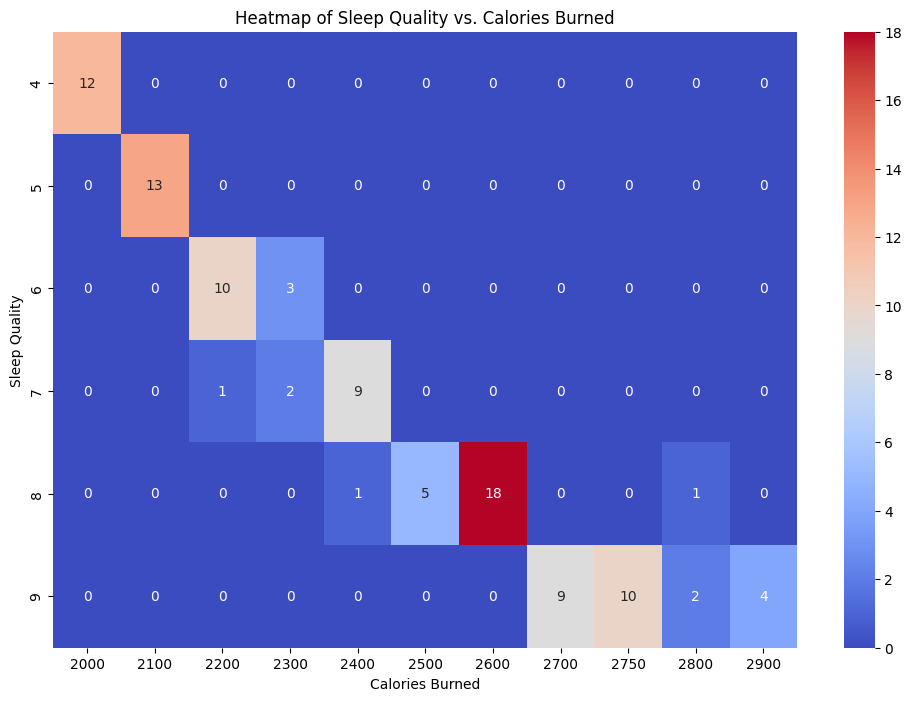

In [45]:
# Create a heatmap of Sleep Quality vs. Calories Burned
heatmap_data = pd.crosstab(data['Sleep_Quality'], data['Calories_Burned'])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap of Sleep Quality vs. Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Sleep Quality')
plt.show()

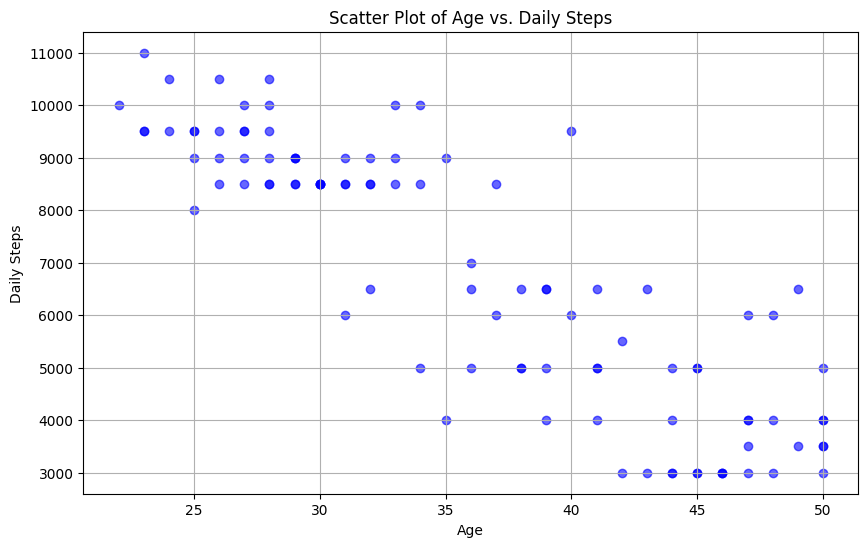

In [48]:
# Scatter plot of Age vs. Daily Steps
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Daily_Steps'], alpha=0.6, color='blue')
plt.title('Scatter Plot of Age vs. Daily Steps')
plt.xlabel('Age')
plt.ylabel('Daily Steps')
plt.grid(True)
plt.show()

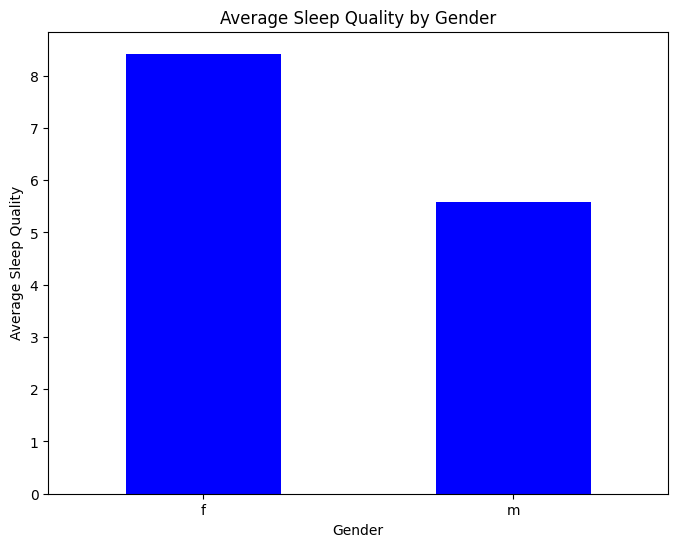

In [50]:
# Calculate average sleep quality by gender
avg_sleep_quality_by_gender = data.groupby('Gender')['Sleep_Quality'].mean()

# Bar plot of average sleep quality by gender
plt.figure(figsize=(8, 6))
avg_sleep_quality_by_gender.plot(kind='bar', color=['blue', 'blue'])
plt.title('Average Sleep Quality by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Sleep Quality')
plt.xticks(rotation=0)
plt.show()

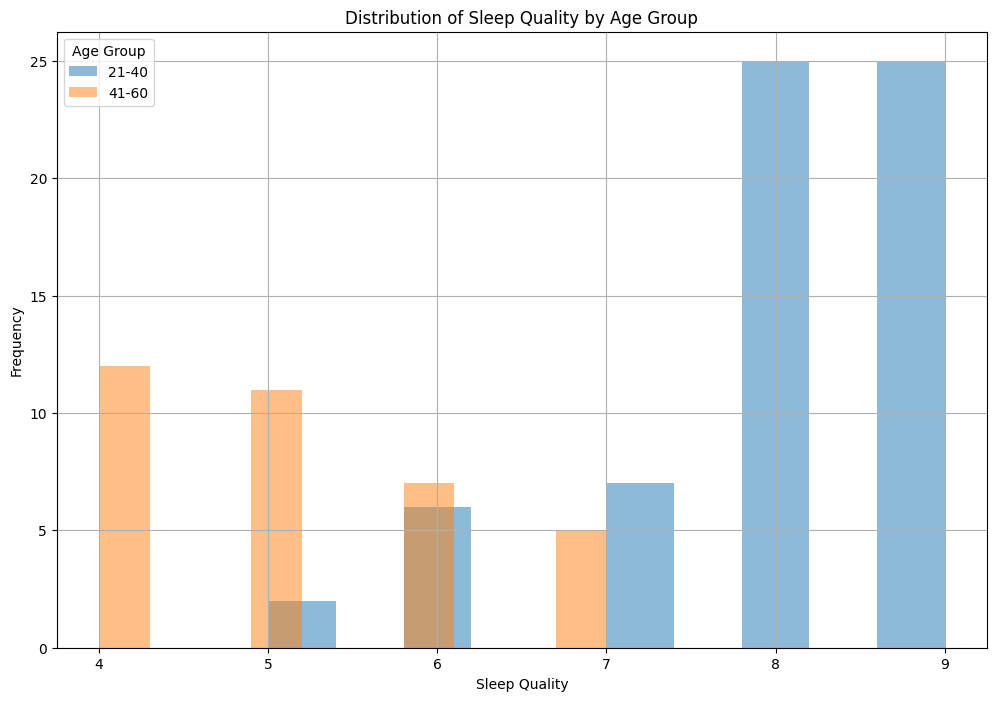

In [54]:
# Create age groups
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Histogram of Sleep Quality by Age Group
plt.figure(figsize=(12, 8))
for age_group in data['Age_Group'].unique():
    subset = data[data['Age_Group'] == age_group]
    plt.hist(subset['Sleep_Quality'], bins=10, alpha=0.5, label=age_group)

plt.title('Distribution of Sleep Quality by Age Group')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

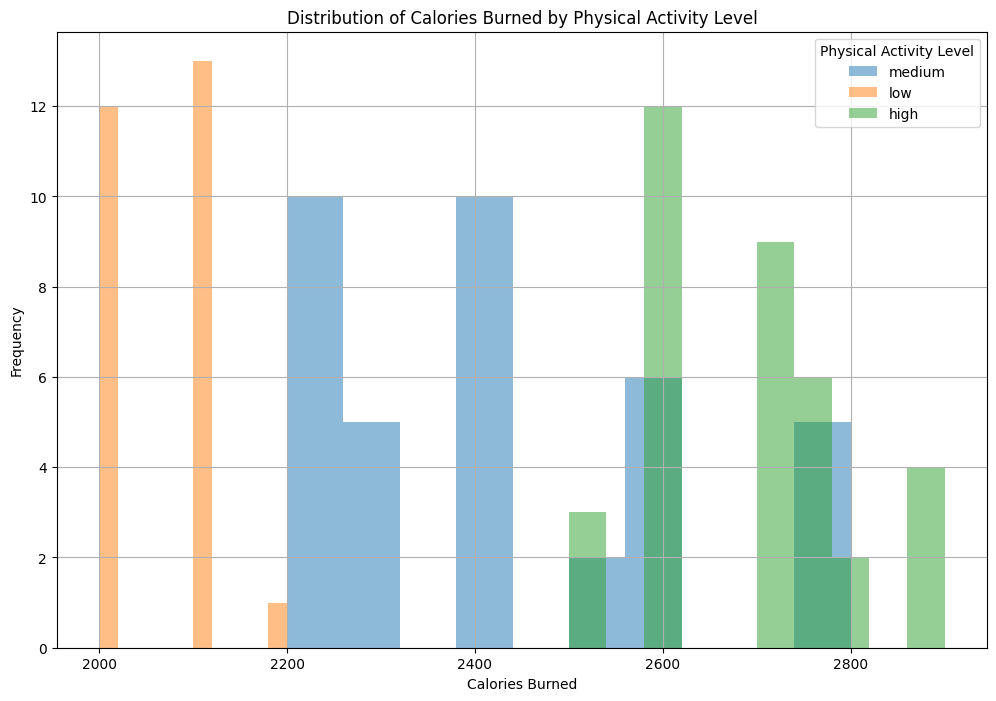

In [56]:
# Histogram of Calories Burned by Physical Activity Level
plt.figure(figsize=(12, 8))
for activity_level in data['Physical_Activity_Level'].unique():
    subset = data[data['Physical_Activity_Level'] == activity_level]
    plt.hist(subset['Calories_Burned'], bins=10, alpha=0.5, label=activity_level)

plt.title('Distribution of Calories Burned by Physical Activity Level')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.legend(title='Physical Activity Level')
plt.grid(True)
plt.show()

In [58]:
categorical_features = ['Gender', 'Physical_Activity_Level', 'Dietary_Habits', 'Sleep_Disorders', 'Medication_Usage']
numeric_features = ['Age', 'Daily_Steps', 'Calories_Burned']

X = data[categorical_features + numeric_features]
y = data['Sleep_Quality']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print("Model R^2 Score: ", model.score(X_test, y_test))

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Model R^2 Score:  0.9577274939105904
Mean Absolute Error (MAE): 0.25126664889803163
Mean Squared Error (MSE): 0.1330527129164165


In [60]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Average Cross-Validation R^2 Score: {cv_scores.mean()}')

Cross-Validation R^2 Scores: [0.8767049  0.96026715 0.97659429 0.98608172 0.98599641]
Average Cross-Validation R^2 Score: 0.957128893617907
